In [186]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings                       
warnings.filterwarnings("ignore")

In [3]:
#Loading the dataset

df = pd.read_csv("HR_data.csv")
df.head()

SLNO  Candidate.Ref DOJ.Extended  Duration.to.accept.offer  Notice.period  \
0     1        2110407          Yes                        14             30   
1     2        2112635           No                        18             30   
2     3        2112838           No                         3             45   
3     4        2115021           No                        26             30   
4     5        2115125          Yes                         1            120   

  Offered.band  Pecent.hike.expected.in.CTC  Percent.hike.offered.in.CTC  \
0           E2                       -20.79                        13.16   
1           E2                        50.00                       320.00   
2           E2                        42.84                        42.84   
3           E2                        42.84                        42.84   
4           E2                        42.59                        42.59   

   Percent.difference.CTC Joining.Bonus Candidate.relocate.actual  Gender  \
0                   42.86            No                        No  Female   
1                  180.00            No                        No    Male   
2                    0.00            No                        No    Male   
3                    0.00            No                        No    Male   
4                    0.00            No                       Yes    Male   

    Candidate.Source  Rex.in.Yrs    LOB Location  Age  Status  
0             Agency           7    ERS    Noida   34  Joined  
1  Employee Referral           8  INFRA  Chennai   34  Joined  
2             Agency           4  INFRA    Noida   27  Joined  
3  Employee Referral           4  INFRA    Noida   34  Joined  
4  Employee Referral           6  INFRA    Noida   34  Joined

In [4]:
df.shape #returns no. of rows and columns

(8995, 18)

In [5]:
df1=df.drop(['SLNO','Candidate.Ref'], axis = 1) 

- we are dropping these both columns as they are unique features and doesnt contribute in model building.

In [6]:
df1.dtypes #data types in our dataset

DOJ.Extended                    object
Duration.to.accept.offer         int64
Notice.period                    int64
Offered.band                    object
Pecent.hike.expected.in.CTC    float64
Percent.hike.offered.in.CTC    float64
Percent.difference.CTC         float64
Joining.Bonus                   object
Candidate.relocate.actual       object
Gender                          object
Candidate.Source                object
Rex.in.Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

### checking whether there are any missing values in dataset

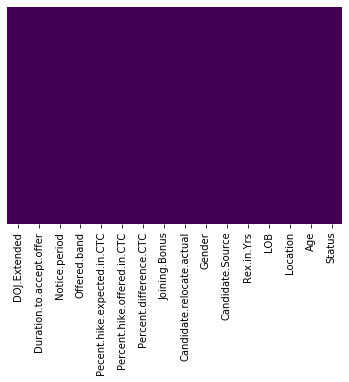

In [7]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Observation
- There are no null values in our data.

In [8]:
df1.isnull().sum()

DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

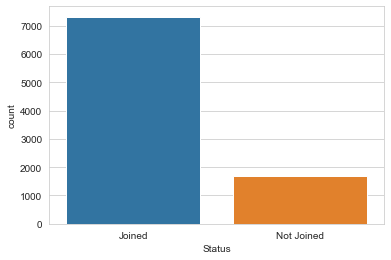

In [9]:
#count for no.of data points which belongs to different classes of our target variable.

sns.set_style('whitegrid')
sns.countplot(x='Status',data=df1)

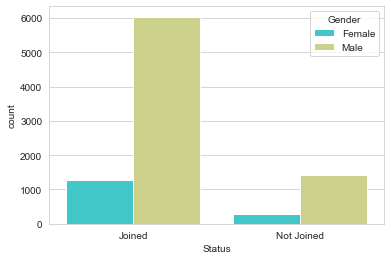

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Status',hue='Gender',data=df1,palette='rainbow')

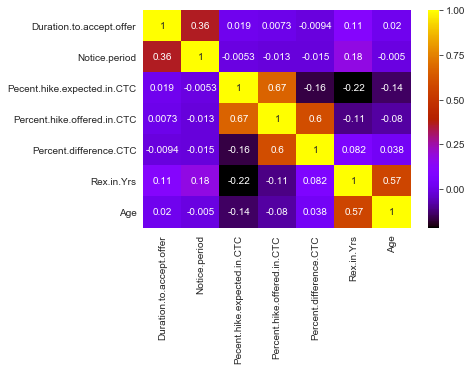

In [11]:
corr = df1.corr() #correlation plot 
sns.heatmap(corr, annot = True, cmap = 'gnuplot')

In [12]:
data2 = df1.iloc[:,:-1] #dependent variables

In [13]:
data1 = pd.get_dummies(data2,drop_first = True)
data1.shape

(8995, 34)

In [14]:
data4=pd.DataFrame()

In [189]:
data4['status']=df1.iloc[:,-1] #independent variables
data4.tail(7)

status
8988      Joined
8989  Not Joined
8990      Joined
8991      Joined
8992      Joined
8993      Joined
8994      Joined

In [17]:
data_with_dummies = pd.concat([data1,data4],1) #create dummies for categorial variables
data_with_dummies.shape

(8995, 35)

In [18]:
#replace the joined as 0 and not joined as 1

data_with_dummies['status'] = data_with_dummies.loc[:,'status'].replace(['Joined', 'Not Joined'], [0,1]) 

In [19]:
data_with_dummies.shape #after creating dummies the number of columns has increased to 35

(8995, 35)

In [21]:
#split into train and test data

X = data_with_dummies.drop(['status'], 1)
y = data_with_dummies['status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7196, 34), (1799, 34), (7196,), (1799,))

In [23]:
#Build a logistic model using the split data

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
prediction = clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1458
           1       0.36      0.04      0.06       341

    accuracy                           0.81      1799
   macro avg       0.59      0.51      0.48      1799
weighted avg       0.73      0.81      0.73      1799



- The accuracy of our model is quite is good almost 81% but recall and precision of class 1 is too low.Lets find the reason of it one of the reason may be because of imbalanced data

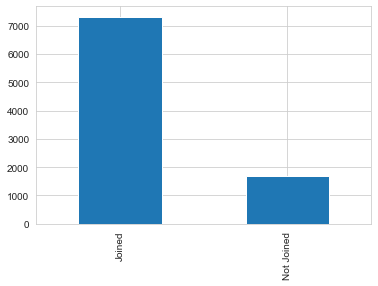

In [192]:
data4['status'].value_counts().plot.bar()

- The plot shows that the data we have is a imbalance data.
- we can balance data by using different techniques like upsampling, smote etc.

### Using smote to balance the data

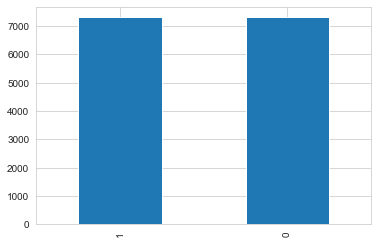

In [194]:
from imblearn.over_sampling import SMOTE
X_resample,y_resample = SMOTE().fit_resample(X, y)
X_resample = pd.DataFrame(X_resample, columns = X.columns)
pd.Series(y_resample).value_counts().plot.bar() 

- we can see that our data is balanced now

In [195]:
#split data intro train and test data

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11700, 34), (2926, 34), (11700,), (2926,))

In [196]:
# build model using split data

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
pred = clf.predict(X_test)

In [199]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66      1420
           1       0.68      0.77      0.72      1506

    accuracy                           0.69      2926
   macro avg       0.69      0.69      0.69      2926
weighted avg       0.69      0.69      0.69      2926



- we can see that precision and recall has increased a lot after balancing data.

### Feature engineering

In [201]:
from sklearn.linear_model import LassoCV

In [202]:
reg_alpha = LassoCV()
reg_alpha.fit(X_train,y_train)
print("Best alpha using built-in LassoCV: %f" % reg_alpha.alpha_)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.002722
Lasso picked 18 variables and eliminated the other 16 variables


In [203]:
coef = pd.Series(reg_alpha.coef_, index = X.columns)

Text(0.5, 1.0, 'Feature importance using Lasso Model')

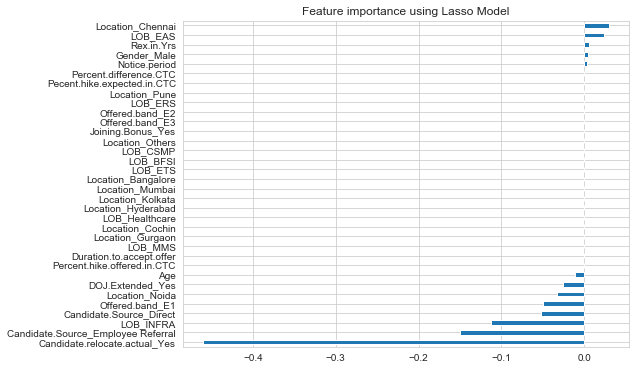

In [207]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 6)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

- we remove all the columns whose coefficient value is 0

In [208]:
target_features = sum(coef != 0)
lasso_features = list(imp_coef[imp_coef!=0].sort_values(ascending=False).index)[:target_features]
lasso_features

['Location_Chennai',
 'LOB_EAS',
 'Rex.in.Yrs',
 'Gender_Male',
 'Notice.period',
 'Percent.difference.CTC',
 'Pecent.hike.expected.in.CTC',
 'Duration.to.accept.offer',
 'Percent.hike.offered.in.CTC',
 'Age',
 'DOJ.Extended_Yes',
 'Location_Noida',
 'Offered.band_E1',
 'Candidate.Source_Direct',
 'LOB_INFRA',
 'Candidate.Source_Employee Referral',
 'Candidate.relocate.actual_Yes']

- These are our selected features and we built a new model using only these features.

In [209]:
X_train_new_features = X_train[lasso_features]
X_test_new_features = X_test[lasso_features]

In [210]:
clf = LogisticRegression()
clf.fit(X_train_new_features, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
pred1=clf.predict(X_test_new_features)

In [216]:
y_pred_prob=clf.predict_proba(X_test_new_features)

In [217]:
import innomatics 

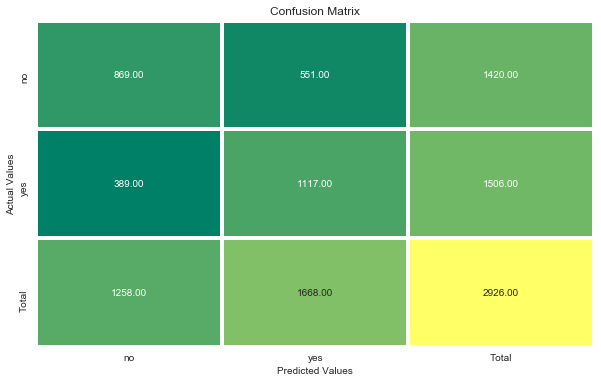

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.69      0.61      0.65      1420
           1       0.67      0.74      0.70      1506

    accuracy                           0.68      2926
   macro avg       0.68      0.68      0.68      2926
weighted avg       0.68      0.68      0.68      2926


************************************Kappa Score************************************


Kappa Score = 0.35482751082074393

******************************Area Under Curve Score******************************


AUC Score = 0.6768358490918953
Number of probabilities to build ROC = 1185


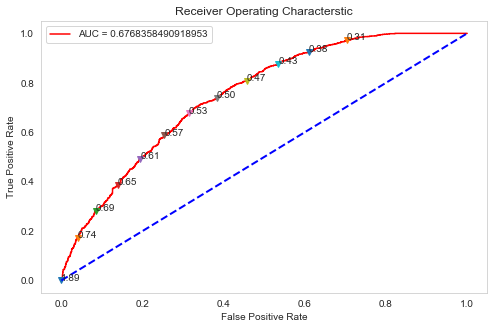

In [229]:
innomatics.classification_metric(y_test,pred1,y_pred_prob[:,1],label=['no','yes'],n=100,verbose=True)

- Given that Cost of predicting “Not Joining” as “Joining” (FPs) cases is 3 times more than predicting “Joining” as “Not Joining” (FNs)
- hence we have find a threshold which can result in desired output where 0.5 is default threshold.

In [219]:
y_pred_prob_test=clf.predict_proba(X_test_new_features)
y_pred_prob_test_1=y_pred_prob_test[:,1]

In [226]:
pre=innomatics.threshold()
threh_prob=0.445
pre.th=threh_prob 
yy=pd.Series(y_pred_prob_test_1)
y_pred_class_test=yy.apply(pre.predict_threshold)

Text(52.0, 0.5, 'True values')

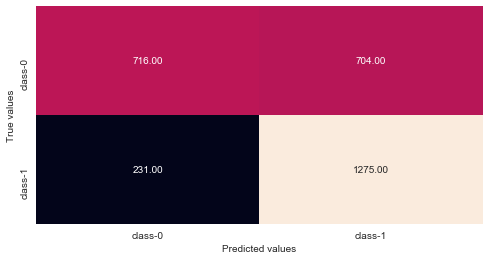

In [227]:
cm=confusion_matrix(y_test,y_pred_class_test)
plt.figure(figsize=(8,4))

sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('True values')

- from above we can see that we obtained our desired result where fp/fn=3

In [230]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65      1420
           1       0.67      0.74      0.70      1506

    accuracy                           0.68      2926
   macro avg       0.68      0.68      0.68      2926
weighted avg       0.68      0.68      0.68      2926



- our final accuracy is 68% where precision and recall are 67 and 74.

## Desicion Tree

In [231]:
from sklearn.tree import DecisionTreeClassifier # for classification of tree
from sklearn.tree import export_graphviz # for vizualization of tree

In [232]:
model=DecisionTreeClassifier(criterion='gini',max_depth=None)

In [236]:
model.fit(X_train_new_features,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [237]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

In [238]:
y_pred=model.predict(X_test_new_features)

In [242]:
y_pred_prob=model.predict_proba(X_test_new_features)[:,1]

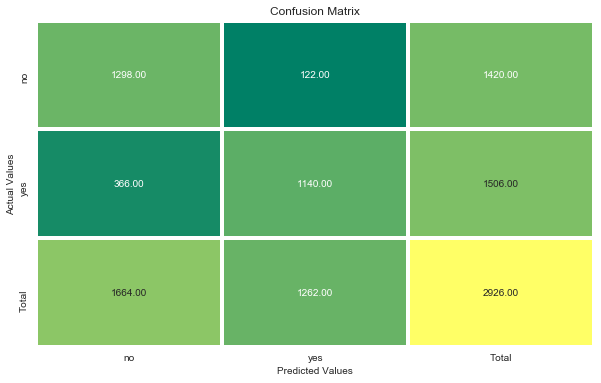

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1420
           1       0.90      0.76      0.82      1506

    accuracy                           0.83      2926
   macro avg       0.84      0.84      0.83      2926
weighted avg       0.84      0.83      0.83      2926


************************************Kappa Score************************************


Kappa Score = 0.6677803567406789

******************************Area Under Curve Score******************************


AUC Score = 0.8355283092980191
Number of probabilities to build ROC = 11


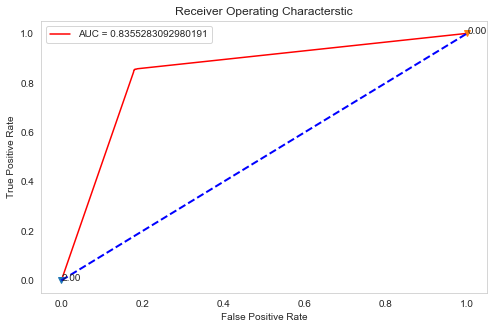

In [261]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=10,verbose=True)

- using decision tree we got a good accuracy and kappa score

In [162]:
import pydotplus # for visualising trees

In [244]:
export_graphviz(model,out_file='HR_analysis.odt',feature_names=X_train_new_features.columns,filled=True)

In [245]:
graph = pydotplus.graph_from_dot_file('HR_analysis.odt')

In [246]:
graph.write_pdf('hr_analysis_tree.pdf')

True

In [247]:
graph.write_jpg('hr_analysis_tree.jpg')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.398669 to fit



True

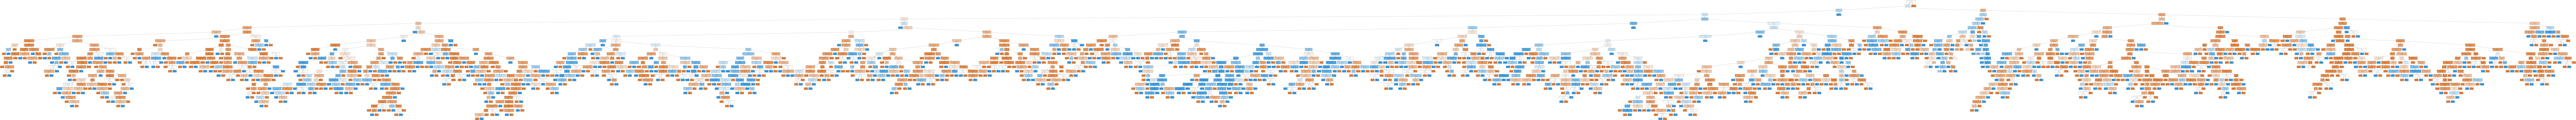

In [248]:
from IPython.display import Image
Image("hr_analysis_tree.jpg")

### Grid search cross validation

In [249]:
from sklearn.model_selection import GridSearchCV #grid search cross validation
#hyper parameter tuning

In [250]:
model_tune = DecisionTreeClassifier()

In [251]:
tuned_parameter = [{'criterion':['gini','entropy'],'max_depth':range(2,10)}]

In [252]:
clf= GridSearchCV(model_tune,param_grid=tuned_parameter,cv=10,scoring='roc_auc')
clf.fit(X_train_new_features,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_dis

In [253]:
clf.best_score_

0.9051616299349946

In [254]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 9}

- our best parameters are gini and max depth is 9 now we can build a new model using new parameters.

In [255]:
model=DecisionTreeClassifier(criterion='gini',max_depth=9)

In [256]:
model.fit(X_train_new_features,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [257]:
y_pred=model.predict(X_test_new_features)

In [258]:
export_graphviz(model,out_file='hr__.odt',feature_names=X_train_new_features.columns,filled=True)
graph1=pydotplus.graph_from_dot_file('hr__.odt')
graph1.write_jpg('hr_tree.jpg')

True

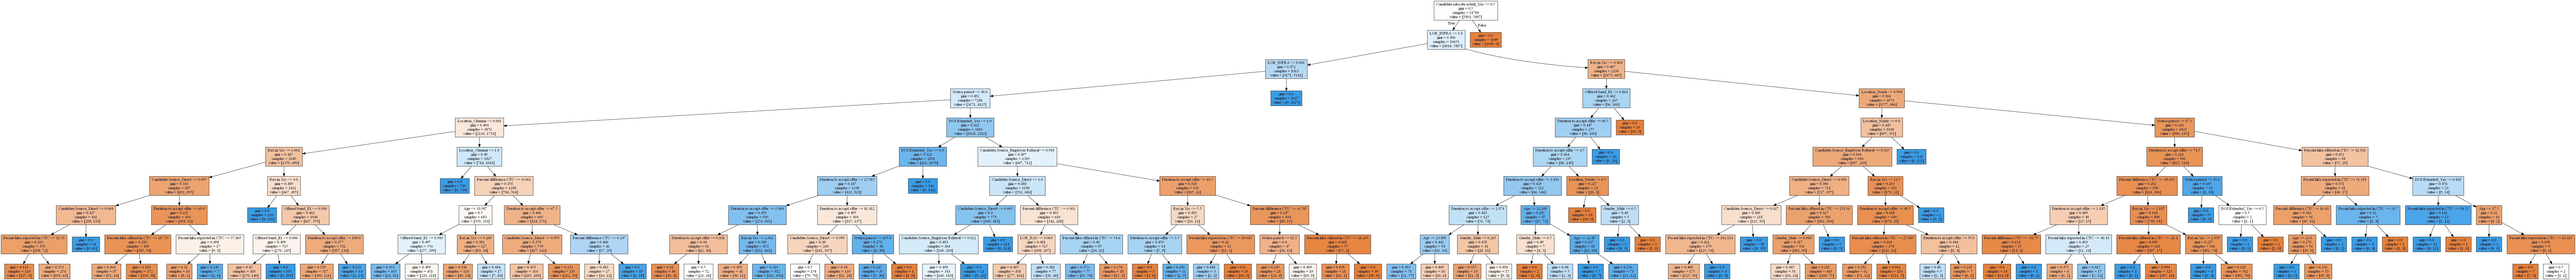

In [259]:
from IPython.display import Image
Image("hr_tree.jpg")

- we can define rules using the tree

In [260]:
cr=classification_report(y_test,y_pred)
print(cr)
print('-'*50)
kappa_score=cohen_kappa_score(y_test,y_pred)
print("kappa score = ",kappa_score)
print('-'*50)
auc_score=roc_auc_score(y_test,y_pred)
print('AUC score',auc_score)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1420
           1       0.90      0.76      0.82      1506

    accuracy                           0.83      2926
   macro avg       0.84      0.84      0.83      2926
weighted avg       0.84      0.83      0.83      2926

--------------------------------------------------
kappa score =  0.6677803567406789
--------------------------------------------------
AUC score 0.8355283092980191


- finally using the best parameters we have an accuracy of 83% and kappa score around to be 66% which is a good sign for a model.